In [57]:
import pandas as pd
import numpy as np

In [48]:
l1000_sigs_path = "/home/sgf2/DBMI_server/drug_repo/data/lincs_level3_all_perts.pkl"
l1000_sigs = pd.read_pickle(l1000_sigs_path)

pert_time="6.0"
pert_dose="um@10.0"
nan = np.nan

eight_cell_lines = ["HA1E","HCC515","VCAP","A375","PC3","MCF7","A549", "HT29"]
nine_cell_lines = ["HEPG2","HA1E","HCC515","VCAP","A375","PC3","MCF7","A549", "HT29"]
twelve_cell_lines = ["NPC", "FIBRNPC", "NEU", "HEPG2","HA1E","HCC515","VCAP","A375","PC3","MCF7","A549", "HT29"]

l1000_perts = l1000_sigs.query('pert_time == @pert_time ' +
                               '& pert_dose == @pert_dose ' +
                               '& pert_type == "trt_cp" ' +
                                '& canonical_smiles not in ["-666", "restricted", @nan] ')

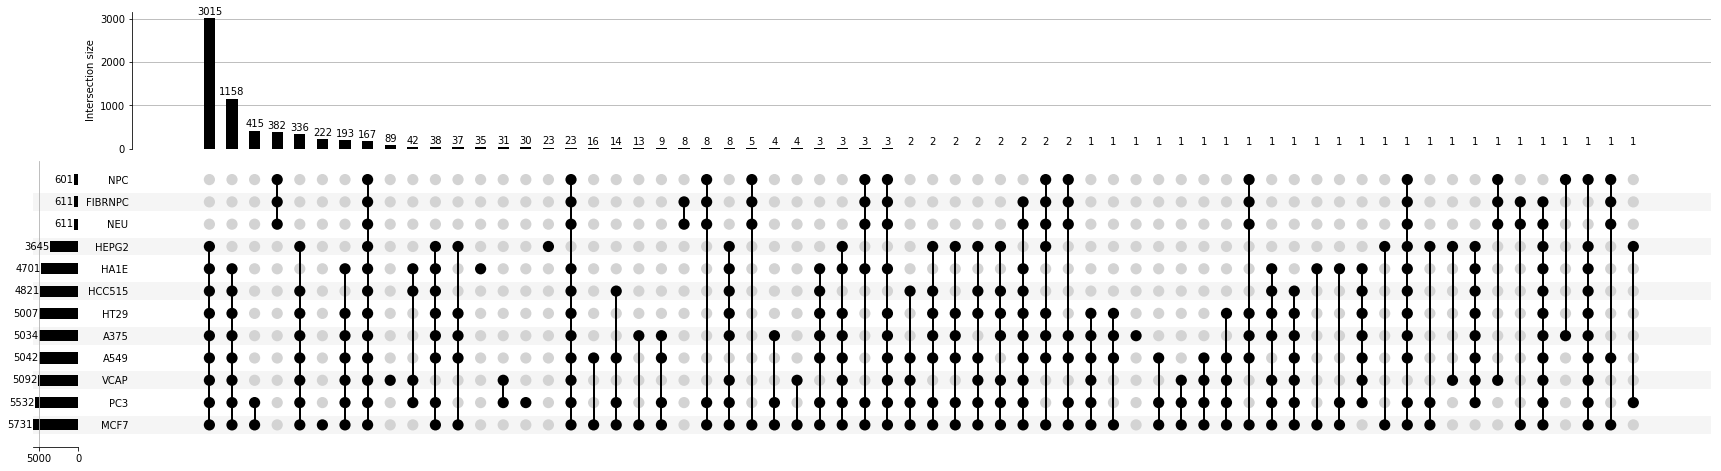

In [18]:
from matplotlib import pyplot
from upsetplot import from_contents, from_memberships
from upsetplot import plot as plot_upset

cell_line_pert_dict = {cell_line:set(l1000_perts.query("cell_id == @cell_line").index.get_level_values("pert_id").unique()) for cell_line in twelve_cell_lines}
upset_from_contents = from_contents(cell_line_pert_dict)
plot_upset(upset_from_contents, sum_over = False, show_counts = True,
          sort_by="cardinality")
pyplot.show()

In [65]:
perts_in_top_8 = set.intersection(*[cell_line_pert_dict[cl] for cl in eight_cell_lines] )
perts_in_top_9 = set.intersection(*[cell_line_pert_dict[cl] for cl in nine_cell_lines] )
perts_in_top_12 = set.intersection(*[cell_line_pert_dict[cl] for cl in twelve_cell_lines] )
perts_in_top_9_not_12 = perts_in_top_9.difference(perts_in_top_12)
perts_in_top_8_not_12 = perts_in_top_8.difference(perts_in_top_12)
print("Top 8:      ", len(perts_in_top_8),
      "\nTop 9:      ", len(perts_in_top_9),
      "\nTop 12:     ", len(perts_in_top_12),
      "\nT8 w/o T12: ", len(perts_in_top_8_not_12),
      "\nT9 w/o T12: ", len(perts_in_top_9_not_12))

Top 8:       4367 
Top 9:       3184 
Top 12:      167 
T8 w/o T12:  4200 
T9 w/o T12:  3017


In [70]:
l1000_top_8 = l1000_sigs.query('pert_time == @pert_time ' +
                               '& pert_dose == @pert_dose ' +
                                '& cell_id in @eight_cell_lines'
                                '& ((pert_id in @perts_in_top_8) | (pert_type in ["ctl_vehicle", "ctl_untrt"]))')

l1000_top_9 = l1000_sigs.query('pert_time == @pert_time ' +
                               '& pert_dose == @pert_dose ' +
                                '& cell_id in @nine_cell_lines'
                                '& ((pert_id in @perts_in_top_9) | (pert_type in ["ctl_vehicle", "ctl_untrt"]))')

l1000_top_12 = l1000_sigs.query('pert_time == @pert_time ' +
                               '& pert_dose == @pert_dose ' +
                                '& cell_id in @twelve_cell_lines'
                                '& ((pert_id in @perts_in_top_12) | (pert_type in ["ctl_vehicle", "ctl_untrt"]))')

In [67]:
l1000_top_12.head()

pr_gene_id                                                                                                                                                                     16      \
pr_gene_symbol                                                                                                                                                                   AARS   
cell_id cell_type primary_site subtype            pert_id       pert_name   pert_type plate                   canonical_smiles                           pert_dose pert_time            
A375    cell line skin         malignant melanoma BRD-K80738081 resveratrol trt_cp    LPROT001_A375_6H_X1_B20 Oc1ccc(cc1)\C=C\c1cc(O)cc(O)c1             um@10.0   6.0        11.7541   
                                                                                                                                                                   6.0        11.7649   
                                                                                                                                                                   6.0        11.3418   
                                                  BRD-K79254416 decitabine  trt_cp    LPROT001_A375_6H_X1_B20 Nc1ncn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)n1 um@10.0   6.0        10.7149   
                                                                                                                                                                   6.0        10.8318   

pr_gene_id                                                                                                                                                                     23      \
pr_gene_symbol                                                                                                                                                                  ABCF1   
cell_id cell_type primary_site subtype            pert_id       pert_name   pert_type plate                   canonical_smiles                           pert_dose pert_time            
A375    cell line skin         malignant melanoma BRD-K80738081 resveratrol trt_cp    LPROT001_A375_6H_X1_B20 Oc1ccc(cc1)\C=C\c1cc(O)cc(O)c1             um@10.0   6.0        11.0796   
                                                                                                                                                                   6.0        10.4913   
                                                                                                                                                                   6.0        10.9392   
                                                  BRD-K79254416 decitabine  trt_cp    LPROT001_A375_6H_X1_B20 Nc1ncn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)n1 um@10.0   6.0        11.1527   
                                                                                                                                                                   6.0        11.0485   

pr_gene_id                                                                                                                                                                    25      \
pr_gene_symbol                                                                                                                                                                  ABL1   
cell_id cell_type primary_site subtype            pert_id       pert_name   pert_type plate                   canonical_smiles                           pert_dose pert_time           
A375    cell line skin         malignant melanoma BRD-K80738081 resveratrol trt_cp    LPROT001_A375_6H_X1_B20 Oc1ccc(cc1)\C=C\c1cc(O)cc(O)c1             um@10.0   6.0        9.3544   
                                                                                                                                                                   6.0        8.6342   
                                                                                                                      

In [72]:
l1000_top_8.to_pickle("/home/sgf2/DBMI_server/drug_repo/data/lincs_level3_perts_shared_8_cellLines.pkl")
l1000_top_9.to_pickle("/home/sgf2/DBMI_server/drug_repo/data/lincs_level3_perts_shared_9_cellLines.pkl")
l1000_top_12.to_pickle("/home/sgf2/DBMI_server/drug_repo/data/lincs_level3_perts_shared_12_cellLines.pkl")

In [73]:
l1000_sigs_path_8 = "/home/sgf2/DBMI_server/drug_repo/data/lincs_level3_perts_shared_8_cellLines.pkl"
pd.read_pickle(l1000_sigs_path_8).head()

pr_gene_id                                                                                                                                                                                                   16      \
pr_gene_symbol                                                                                                                                                                                                 AARS   
cell_id cell_type primary_site subtype                               pert_id       pert_name   pert_type plate                      canonical_smiles                                   pert_dose pert_time            
A375    cell line skin         malignant melanoma                    BRD-K56343971 vemurafenib trt_cp    LPROT003_A375_6H_X1.A2_B22 CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(cc23)-... um@10.0   6.0        11.7552   
                                                                                                                                                                                                 6.0        11.9341   
                                                                                                                                                                                                 6.0        11.4471   
A549    cell line lung         non small cell lung cancer| carcinoma BRD-A81177136 KN-62       trt_cp    LPROT003_A549_6H_X1.A2_B22 CN(C(Cc1ccc(OS(=O)(=O)c2cccc3cnccc23)cc1)C(=O)N... um@10.0   6.0        11.7082   
                                                                                                                                                                                                 6.0        11.6725   

pr_gene_id                                                                                                                                                                                                   23      \
pr_gene_symbol                                                                                                                                                                                                ABCF1   
cell_id cell_type primary_site subtype                               pert_id       pert_name   pert_type plate                      canonical_smiles                                   pert_dose pert_time            
A375    cell line skin         malignant melanoma                    BRD-K56343971 vemurafenib trt_cp    LPROT003_A375_6H_X1.A2_B22 CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(cc23)-... um@10.0   6.0        10.1747   
                                                                                                                                                                                                 6.0         9.8499   
                                                                                                                                                                                                 6.0         9.6960   
A549    cell line lung         non small cell lung cancer| carcinoma BRD-A81177136 KN-62       trt_cp    LPROT003_A549_6H_X1.A2_B22 CN(C(Cc1ccc(OS(=O)(=O)c2cccc3cnccc23)cc1)C(=O)N... um@10.0   6.0        10.2552   
                                                                                                                                                                                                 6.0        10.0977   

pr_gene_id                                                                                                                                                                                                  25      \
pr_gene_symbol                                                                                                                                                                                                ABL1   
cell_id cell_type primary_site subtype                               pert_id       pert_name   pert_type plate                    

In [ ]:
cell_line_pert_dict_counts = {cell_line:set(l1000_perts.query("cell_id == @cell_line").index.get_level_values("pert_id").unique()) for cell_line in twelve_cell_lines}


In [96]:
def get_cell_line_count(n):
    cell_lines_pert_dicts_count = {}
    for cell_line in twelve_cell_lines:
        pert_counts = l1000_perts.query("cell_id == @cell_line").index.get_level_values("pert_id").value_counts()
        cell_lines_pert_dicts_count[cell_line] = pert_counts[pert_counts >= n].index.values
    return cell_lines_pert_dicts_count

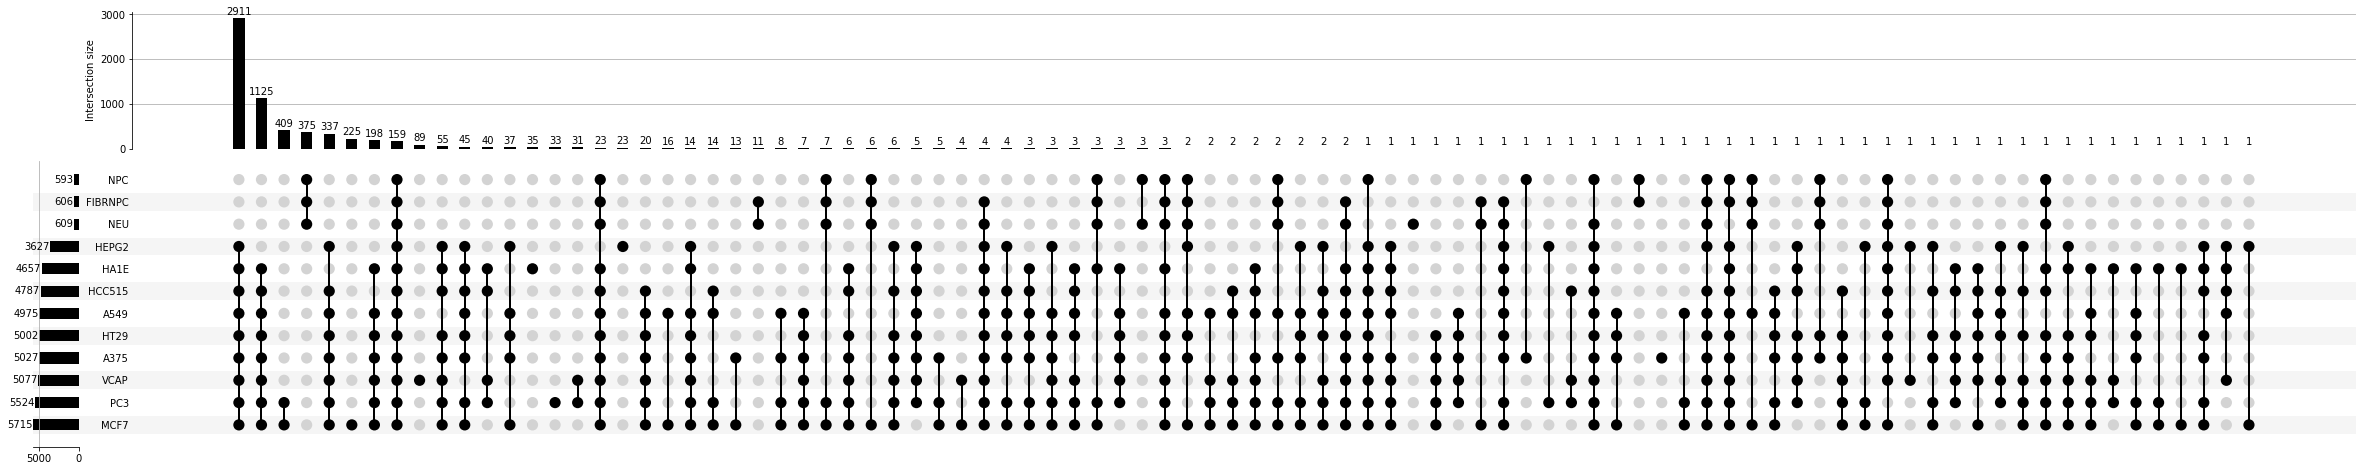

In [116]:
upset_from_contents = from_contents(get_cell_line_count(2))
plot_upset(upset_from_contents, sum_over = False, show_counts = True,
          sort_by="cardinality")
pyplot.show()

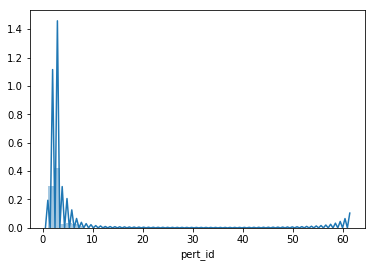

In [122]:
import seaborn as sns
sns.distplot(l1000_perts.query("cell_id == 'A549'").index.get_level_values("pert_id").value_counts())
pyplot.show()

In [121]:
(np.mean(l1000_perts.query("cell_id == 'A549'").index.get_level_values("pert_id").value_counts()),
 np.median(l1000_perts.query("cell_id == 'A549'").index.get_level_values("pert_id").value_counts())
)

(3.0335184450614836, 3.0)

In [127]:
pd.concat([l1000_perts.query("cell_id == 'A549'"), l1000_perts.query("cell_id == 'A375'")]).shape

(38839, 978)